# Importing Important libraries

In [72]:
import pandas as pd
import numpy as np


from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# READING THE DATASETS

In [73]:
data = 'rossman store.csv'

In [74]:
store_df = pd.read_csv(data)

In [75]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [76]:
store_df.head

<bound method NDFrame.head of       Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3        

In [77]:
store_df.info

<bound method DataFrame.info of       Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3      

In [78]:
store_df.shape

(1115, 10)

In [79]:
# Load Train and Test Dataset

train_df = pd.read_csv('rossman train.csv')
test_df = pd.read_csv('rossman test.csv')
print(f"train_df shape: {train_df.shape}")
print(f"test_df shape: {test_df.shape}")

C:\Users\HP\AppData\Local\Temp\ipykernel_1592\3099329605.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('rossman train.csv')


train_df shape: (1017209, 9)
test_df shape: (41088, 8)


In [80]:
# Merge store df and train df for better prediction

train_merged_df = train_df.merge(store_df, how='left', on='Store')
train_merged_df = train_merged_df.drop(['PromoInterval'], axis=1)
train_merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN


In [81]:
# Merge store df and test df

test_merged_df = test_df.merge(store_df, how='left', on='Store')
test_merged_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [82]:
test_merged_df.shape

(41088, 17)

# EDA (EXPLORATORY DATA ANALYSIS)

In [83]:
train_merged_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
dtype: int64

In [84]:
# Check unique value in each column

train_merged_df.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
dtype: int64

In [85]:
# There should be 4 unique values but has 5

train_merged_df.StateHoliday.value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [86]:
# Replacing string '0' as integer '0' 

train_merged_df['StateHoliday'].replace({'0': 0}, inplace=True)
test_merged_df['StateHoliday'].replace({'0': 0}, inplace=True)
train_merged_df.StateHoliday.value_counts()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [87]:
reduced_train_df = train_merged_df[ train_merged_df.Open == 1 ].copy()

When the store is closed, the sale is zero. So rows with sales 0 doesn't make sense.
But it's more efficient to remove rows with store 0. 

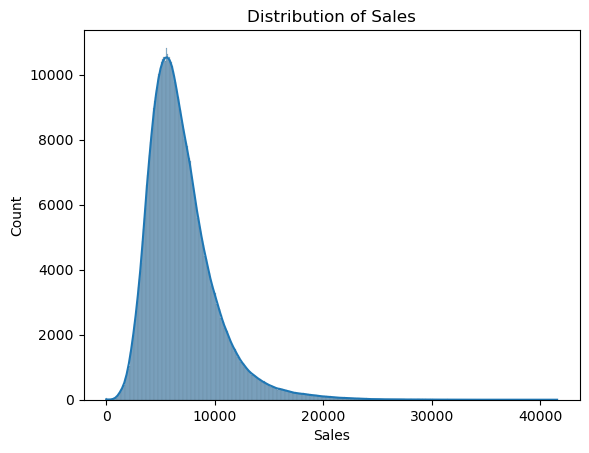

In [117]:
# Univariate analysis for a single variable (e.g., Sales)
sns.histplot(data=reduced_train_df, x='Sales', kde=True)
plt.title('Distribution of Sales')
plt.show()

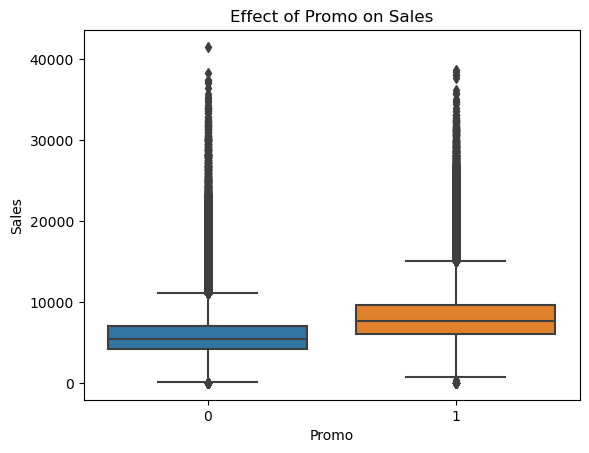

In [118]:
# Bivariate analysis for Sales and Promo
sns.boxplot(data=reduced_train_df, x='Promo', y='Sales')
plt.title('Effect of Promo on Sales')
plt.show()

<Axes: xlabel='Sales', ylabel='Count'>

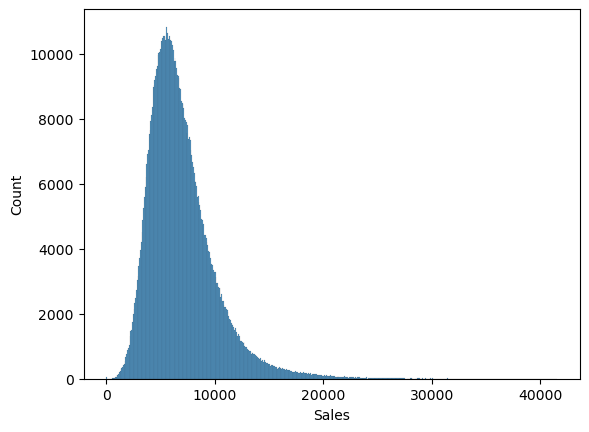

In [92]:
# Distribution of target column named 'sales'

sns.histplot(data=reduced_train_df, x='Sales')

This visualisation shows the distribution of targeted column SALES

<Axes: xlabel='Assortment', ylabel='Count'>

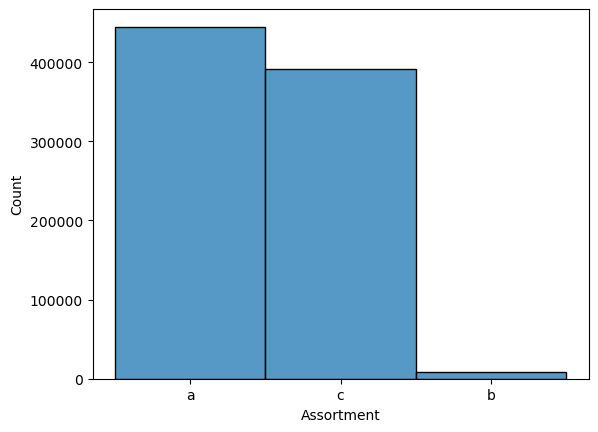

In [93]:
# Distribution of target column named 'sales' tO 'assortment'

sns.histplot(data=reduced_train_df, x='Assortment')

This visualisation shows the distribution of targeted column Sales count to the Assortment

Text(0.5, 1.0, 'Sales vs Customers')

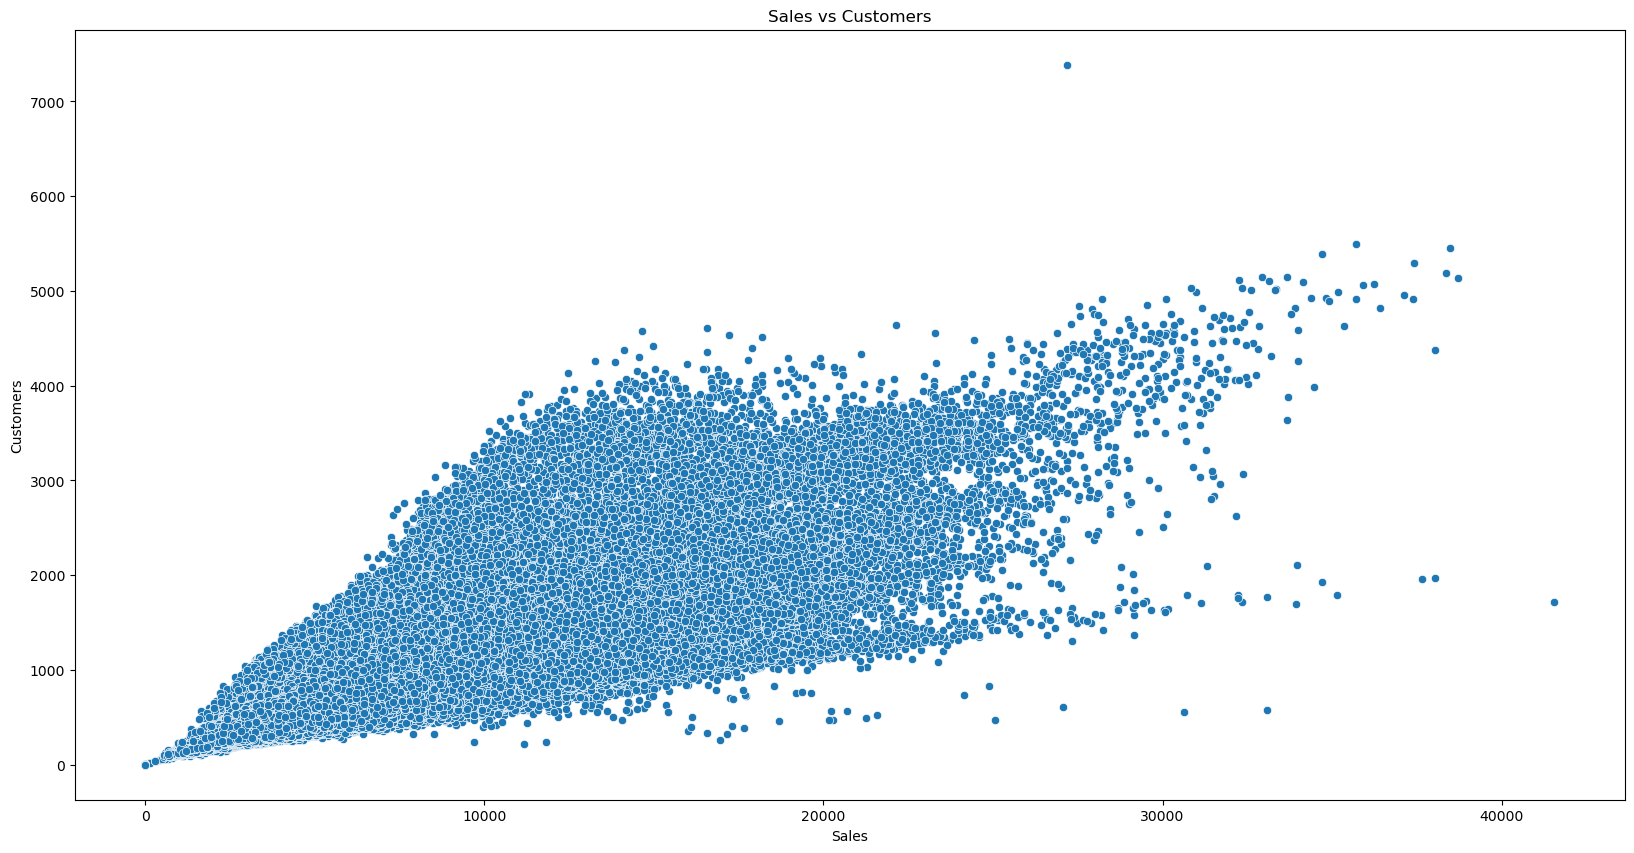

In [94]:
# Sales vs Customers Scatter Plot
plt.figure(figsize=(20, 10))
sns.scatterplot(x=reduced_train_df.Sales, y=reduced_train_df.Customers)
plt.title("Sales vs Customers")


This scatter plot visualizes the relationship between sales and the number of customers

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

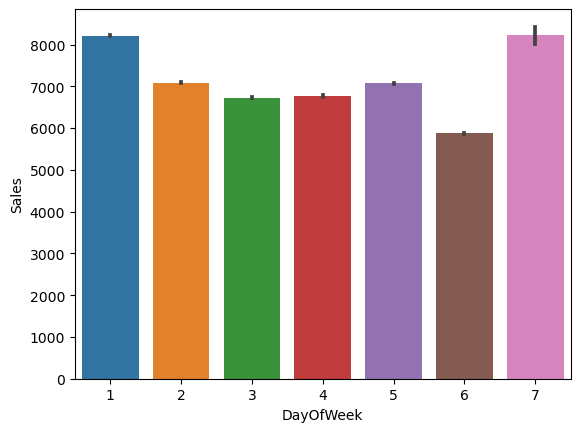

In [95]:
sns.barplot(x=reduced_train_df.DayOfWeek, y=reduced_train_df.Sales)

This bar plot can provide insights into the variations in sales throughout the week, helping to identify peak sales days or trends that may influence business strategies or resource allocation

<Axes: xlabel='StateHoliday', ylabel='Sales'>

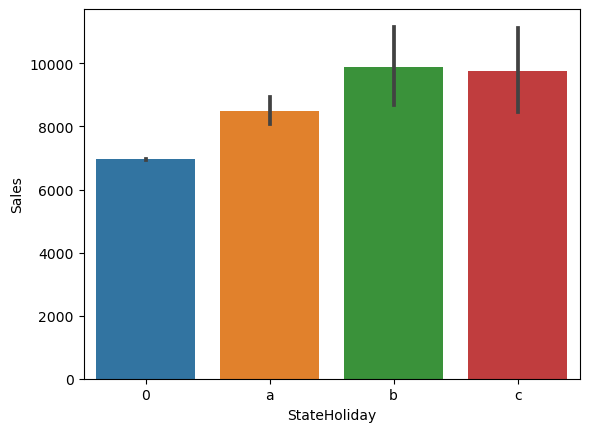

In [96]:
sns.barplot(data=reduced_train_df, x='StateHoliday', y='Sales')

This bar plot helps in understanding how state holidays impact sales performance in Rossman stores. It provides insights into whether there are significant differences in sales on regular days versus state holidays, informing decisions related to promotional strategies or resource planning for holiday periods.

<Axes: xlabel='Assortment', ylabel='Sales'>

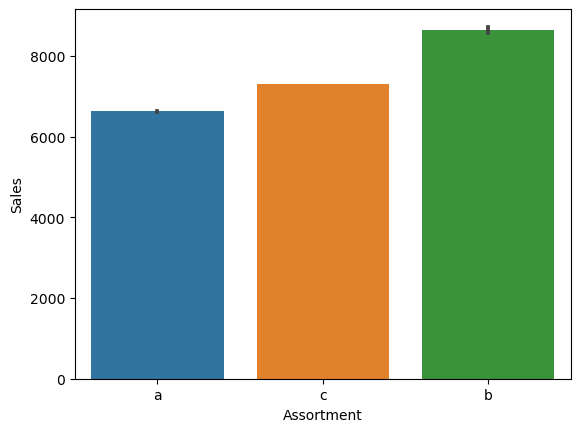

In [97]:
sns.barplot(data=reduced_train_df, x='Assortment', y='Sales')

This bar plot helps in understanding how the variety and diversity of products offered by different assortment types impact sales performance in Rossman stores. It provides insights into whether there are significant differences in sales across different assortment types, which can inform decisions related to product selection, inventory management, and marketing strategies.








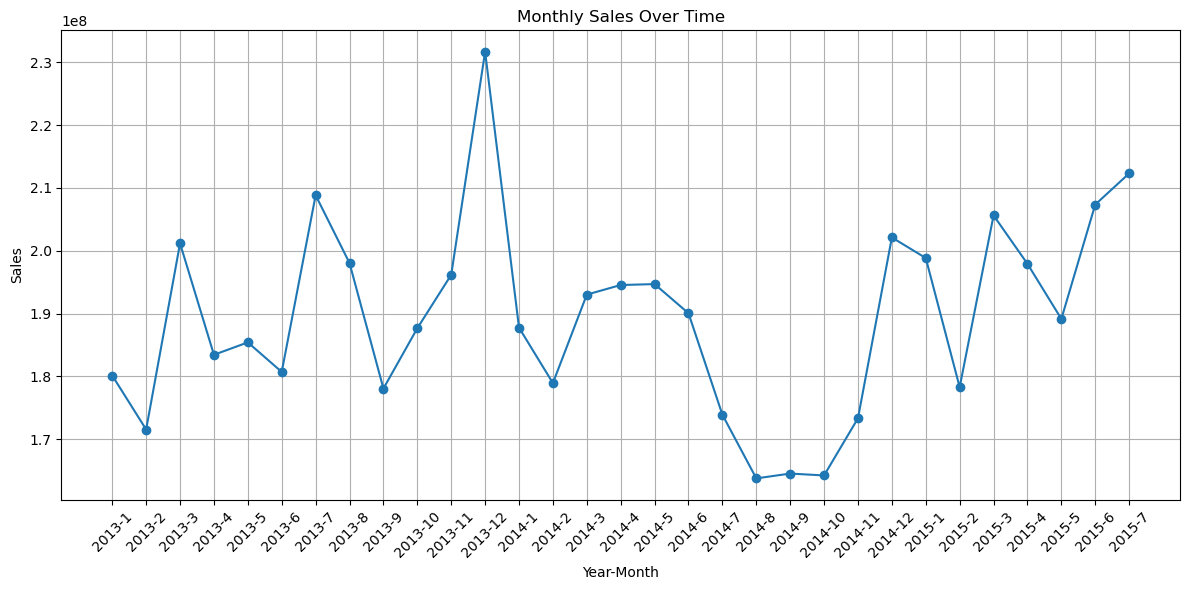

In [98]:
# Visualizing sales for each month over time

# Convert 'Date' column to datetime format
reduced_train_df['Date'] = pd.to_datetime(reduced_train_df['Date'])

# Extracting year and month from the 'Date' column
reduced_train_df['Year'] = reduced_train_df['Date'].dt.year
reduced_train_df['Month'] = reduced_train_df['Date'].dt.month
reduced_train_df['Day'] = reduced_train_df['Date'].dt.day

# Grouping by year and month, and summing up the sales for each group
monthly_sales = reduced_train_df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Plotting the monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str), monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

The plot provides a visual representation of how sales have evolved over time, allowing for the identification of any seasonal patterns, trends, or anomalies in sales performance

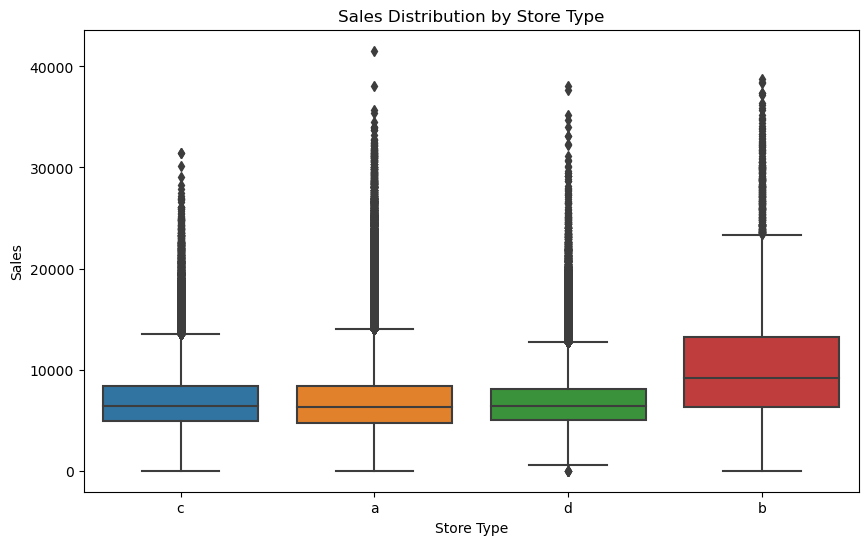

In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=reduced_train_df, x='StoreType', y='Sales')
plt.title('Sales Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

This box plot displays the distribution of sales across different store types, helping to understand how sales vary between different types of stores.

C:\Users\HP\AppData\Local\Temp\ipykernel_1592\864972687.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=reduced_train_df, x='Date', y='Sales', hue='Store', ci=None)


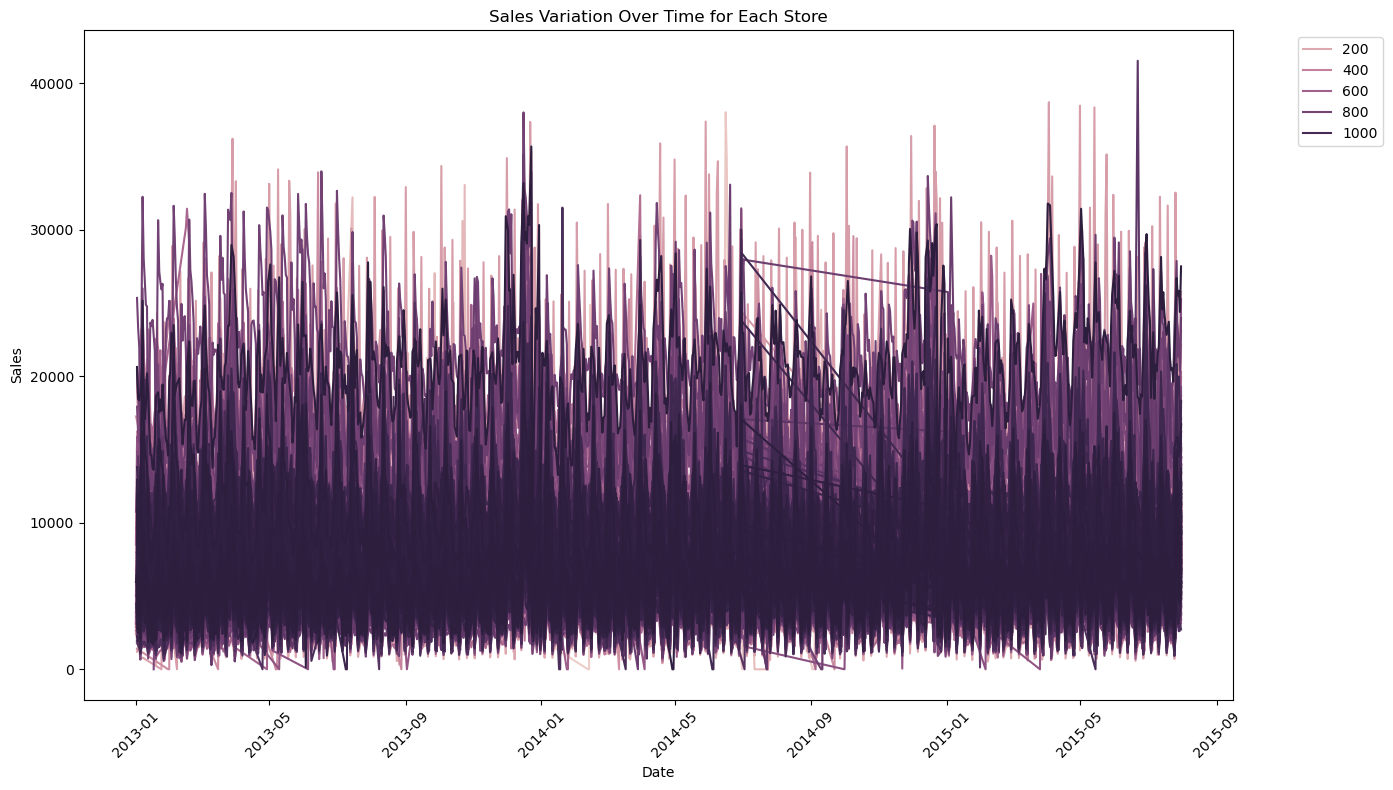

In [100]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=reduced_train_df, x='Date', y='Sales', hue='Store', ci=None)
plt.title('Sales Variation Over Time for Each Store')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This line plot shows the variation in sales over time for each individual store, allowing for a detailed analysis of sales trends and performance for each store.

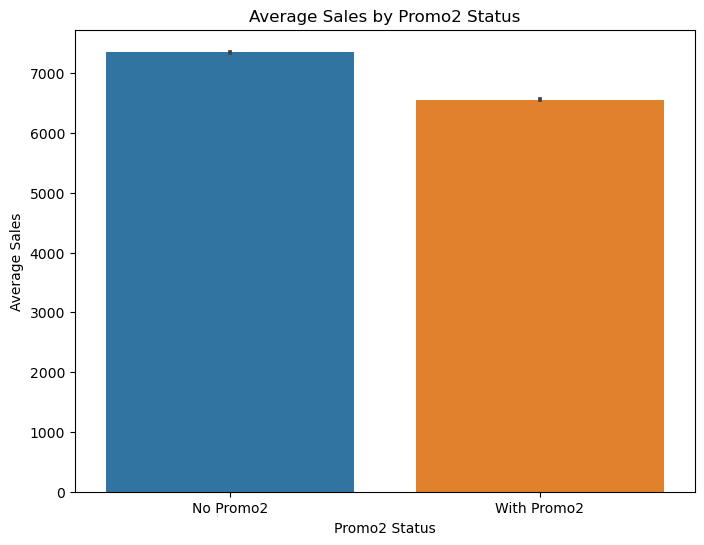

In [101]:
plt.figure(figsize=(8, 6))
sns.barplot(data=reduced_train_df, x='Promo2', y='Sales')
plt.title('Average Sales by Promo2 Status')
plt.xlabel('Promo2 Status')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['No Promo2', 'With Promo2'])
plt.show()

This bar plot compares the average sales between stores with and without Promo2 offers, providing insights into the effectiveness of Promo2 promotions on sales.

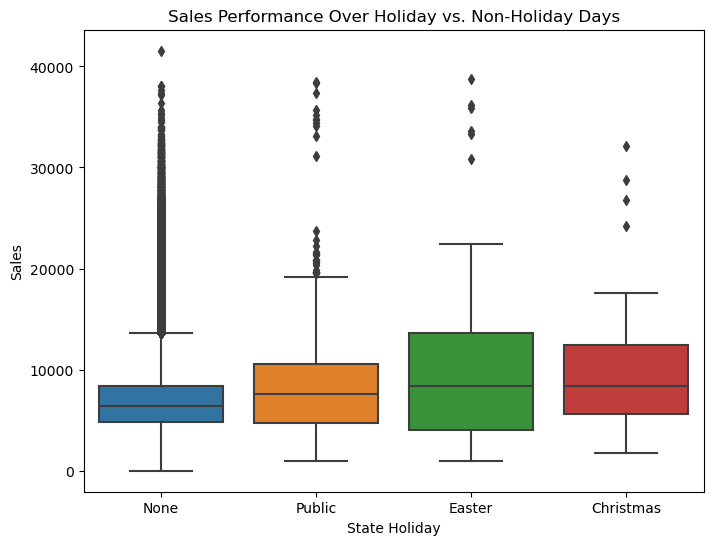

In [102]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=reduced_train_df, x='StateHoliday', y='Sales')
plt.title('Sales Performance Over Holiday vs. Non-Holiday Days')
plt.xlabel('State Holiday')
plt.ylabel('Sales')
plt.xticks([0, 1, 2, 3], ['None', 'Public', 'Easter', 'Christmas'])
plt.show()

This box plot compares the sales performance between holiday and non-holiday days, helping to understand the impact of different types of holidays on sales.

C:\Users\HP\AppData\Local\Temp\ipykernel_1592\1137786296.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=reduced_train_df, x='Month', y='Sales', hue='StoreType', ci=None)


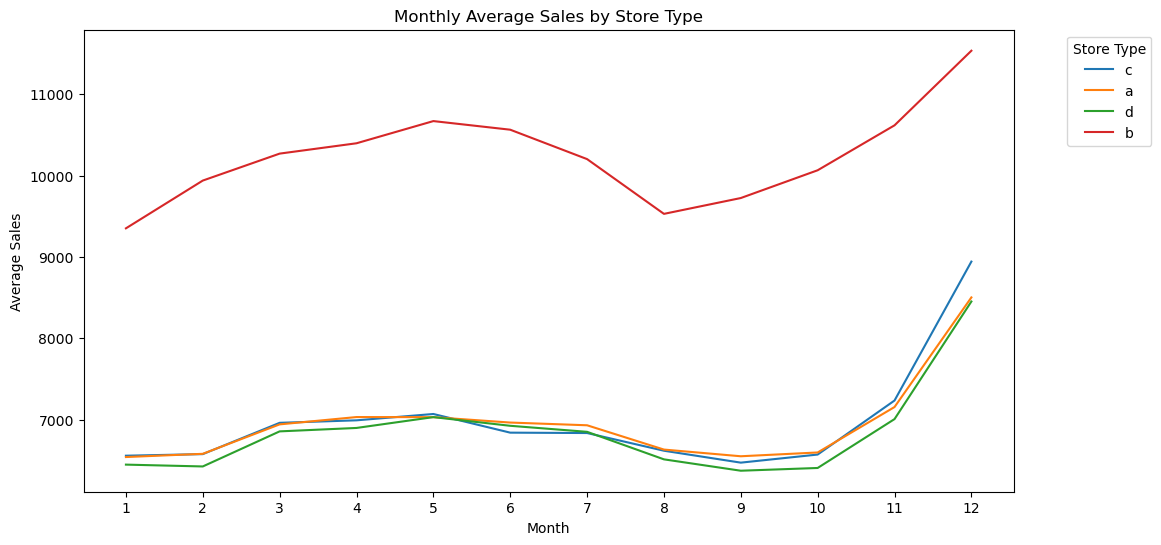

In [103]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=reduced_train_df, x='Month', y='Sales', hue='StoreType', ci=None)
plt.title('Monthly Average Sales by Store Type')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13))
plt.legend(title='Store Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This line plot visualizes the monthly average sales for each store type, allowing for comparisons of sales performance across different store types throughout the year.

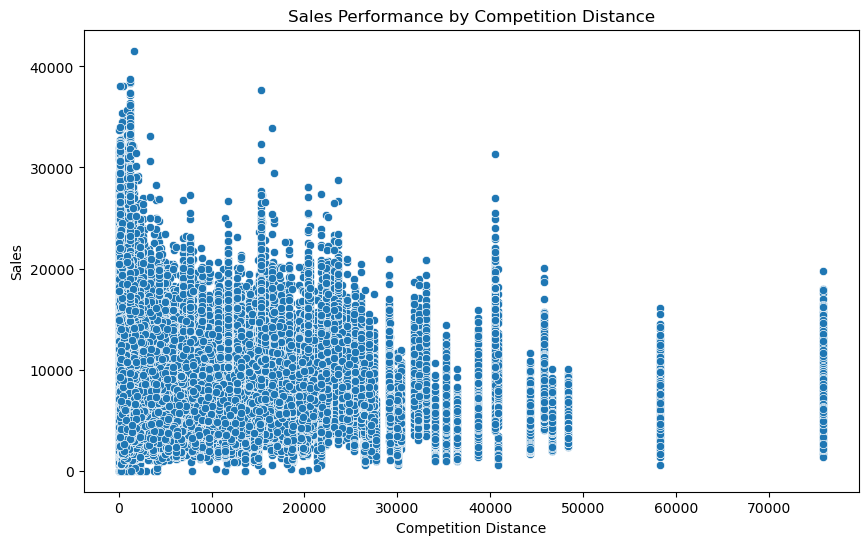

In [104]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=reduced_train_df, x='CompetitionDistance', y='Sales')
plt.title('Sales Performance by Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()

This scatter plot visualizes the relationship between competition distance and sales performance, helping to understand how the proximity of competitors affects sales.

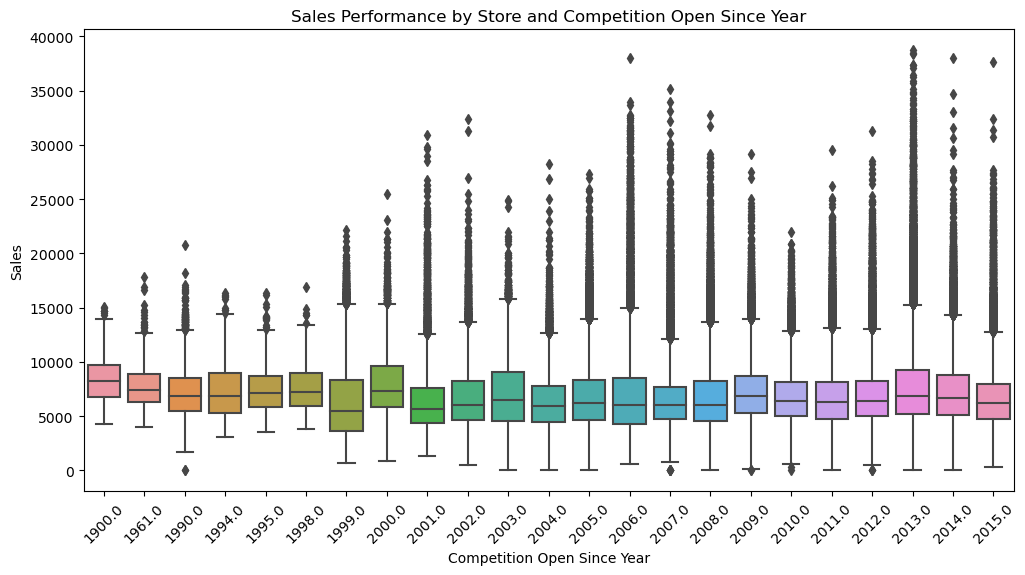

In [105]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=reduced_train_df, x='CompetitionOpenSinceYear', y='Sales')
plt.title('Sales Performance by Store and Competition Open Since Year')
plt.xlabel('Competition Open Since Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

This box plot compares the sales performance of stores based on the year in which competition opened, offering insights into how the presence of competition impacts sales over time.

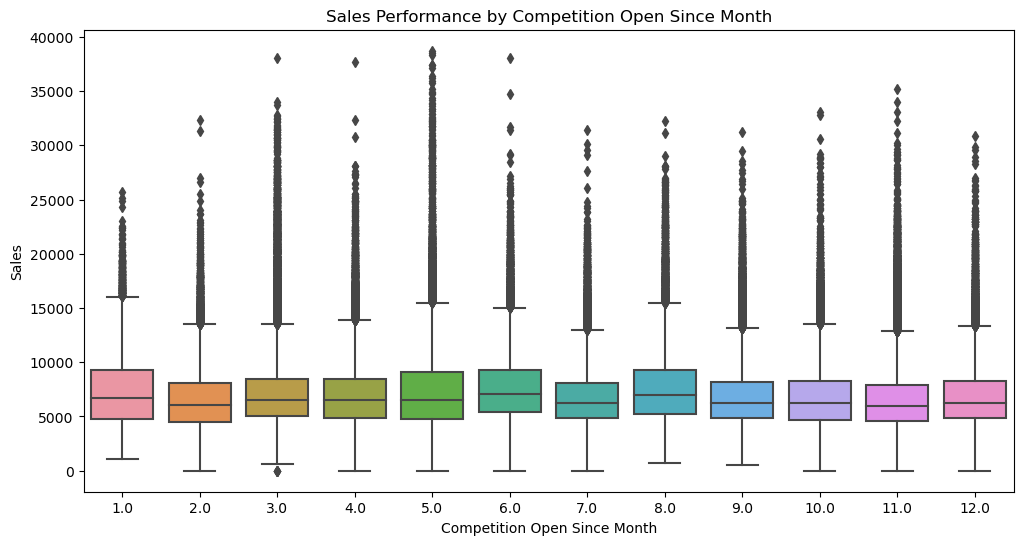

In [106]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=reduced_train_df, x='CompetitionOpenSinceMonth', y='Sales')
plt.title('Sales Performance by Competition Open Since Month')
plt.xlabel('Competition Open Since Month')
plt.ylabel('Sales')
plt.show()

This box plot compares the sales performance of stores based on the month in which competition opened, revealing any variations in sales depending on the time of year when competition became active.

# Split the Dataset

Preparing Test Datasets:

1) Access to test.csv data and merging it with store.csv
2) Transforming Datetime string column to pandas datetime for better access to Date column
3) Create 3 new columns named year, month, day similar to train dataset. 

In [107]:
test_merged_df['Date'] = pd.to_datetime(test_merged_df.Date)

test_merged_df['Year'] = test_merged_df.Date.dt.year
test_merged_df['Month'] = test_merged_df.Date.dt.month
test_merged_df['Day'] = test_merged_df.Date.dt.day

print(f"Estimate Sales from {test_merged_df.Date.dt.date.min()} to {test_merged_df.Date.dt.date.max()}")
test_merged_df

Estimate Sales from 2015-08-01 to 2015-09-17


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,9,17
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN,2015,9,17
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN,2015,9,17
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN,2015,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,8,1
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2015,8,1
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2015,8,1
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2015,8,1


In [108]:
train_df = reduced_train_df[reduced_train_df.Date.dt.year <= 2014]
val_df = reduced_train_df[reduced_train_df.Date.dt.year == 2015]

print(f"Training Shape: {train_df.shape}")
print(f"Validation Shape: {val_df.shape}")
print(f"Test Shape: {test_merged_df.shape}")

Training Shape: (648360, 20)
Validation Shape: (196032, 20)
Test Shape: (41088, 20)


# Data Preprocessing

In [109]:
# Setting columns for training
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Promo2', 'Day', 'Month', 'Year']
# Set Target Column
target_col = 'Sales'

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_merged_df[input_cols].copy()

num_cols = ['Store', 'DayOfWeek', 'Day', 'Month', 'Year']
cat_cols = ['DayOfWeek', 'Promo', 'StoreType', 'Assortment', 'Promo2']

In [110]:
train_inputs = pd.get_dummies(train_inputs)
val_inputs = pd.get_dummies(val_inputs, drop_first=False)
test_inputs = pd.get_dummies(test_inputs)

# Drop the columns that are not in test dataset
train_inputs = train_inputs.drop(['StateHoliday_b', 'StateHoliday_c'], axis=1)
val_inputs = val_inputs.drop(['StateHoliday_b'], axis=1)

In [111]:
# Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(train_inputs[num_cols])

# Based on the learning from training datasets, val_df and test_df columns sclaed!
train_inputs[num_cols] = scaler.transform(train_inputs[num_cols])
val_inputs[num_cols] = scaler.transform(val_inputs[num_cols])
test_inputs[num_cols] = scaler.transform(test_inputs[num_cols])

# MODELLING

In [112]:
## DEFINING RMSPE
def rmspe(y_true, y_pred):
  
   
    # Ensure both arrays have the same length
    assert len(y_true) == len(y_pred)
    
    # Compute the percentage error for each observation
    percentage_error = (y_true - y_pred) / y_true
    
    # Exclude observations where true value is zero
    percentage_error[y_true == 0] = 0
    
    # Square the percentage errors
    squared_percentage_error = percentage_error ** 2
    
    # Compute the mean of the squared percentage errors
    mean_squared_percentage_error = np.mean(squared_percentage_error)
    
      # Compute the square root of the mean squared percentage error
    rmspe = np.sqrt(mean_squared_percentage_error)
    
    return rmspe # Convert to percentage

In [113]:
# A helper function to automate task of fitting model and evaluating

def try_model(model):
    model.fit(train_inputs, train_targets)

    train_preds = model.predict(train_inputs)
    val_preds = model.predict(val_inputs)

    # Get RMSE
    train_rmse = np.round(mean_squared_error(train_targets, train_preds, squared=False), 5)
    val_rmse = np.round(mean_squared_error(val_targets, val_preds, squared=False), 5)

    # Get RMSPE
    train_rmspe = np.round(rmspe(train_targets, train_preds), 5)
    val_rmspe = np.round(rmspe(val_targets, val_preds), 5)


    print(f"Train RMSE: {train_rmse}")
    print(f"Val RMSE: {val_rmse}")
    print()
    print(f"Train RMSPE: {train_rmspe}")
    print(f"Val RMSPE: {val_rmspe}")

    return model

In [114]:
# Creating a dumb model that can predict average sales only
        
def get_mean(input):
    return np.full(len(input), reduced_train_df.Sales.mean())

dum_train_preds = get_mean(train_df)
dum_val_preds = get_mean(val_df)

from sklearn.metrics import mean_squared_error

# Get root mean squared error
dum_train_eval = mean_squared_error(dum_train_preds, train_targets, squared=False)
dum_val_eval = mean_squared_error(dum_val_preds, val_targets, squared=False)

train_rmspe = rmspe(dum_train_preds, train_targets)
val_rmspe = rmspe(dum_val_preds, val_targets)

print(f"train_rmse: {dum_train_eval}")
print(f"val_rmse: {dum_val_eval}")
print()
print(f"train_rmspe: {train_rmspe}")
print(f"val_rmspe: {val_rmspe}")

train_rmse: 3124.212911034433
val_rmse: 3037.1262166880488

train_rmspe: 0.44917065517162236
val_rmspe: 0.4366501296280081


### LINEAR REGRESSION MODEL

In [115]:
logit_model = LinearRegression()
try_model(logit_model)

Train RMSE: 2787.21458
Val RMSE: 2694.48718

Train RMSPE: 0.5378
Val RMSPE: 0.47822


LinearRegression()

### Decision Tree Regressor

In [116]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
try_model(decision_tree_model)

Train RMSE: 0.0
Val RMSE: 1380.17354

Train RMSPE: 0.0
Val RMSPE: 0.21355


DecisionTreeRegressor(random_state=42)

### Random Forest

In [67]:
random_forest_model = RandomForestRegressor(random_state=42, n_jobs=-1)
try_model(random_forest_model)

Train RMSE: 400.79893
Val RMSE: 1134.79363

Train RMSPE: 0.09413
Val RMSPE: 0.1785


RandomForestRegressor(n_jobs=-1, random_state=42)

### Among the models evaluated, it seems that the Decision Tree Regressor performed exceptionally well on the training set, yielding a Train RMSE and RMSPE of 0.0. However, its performance on the validation set, while still competitive, showed an RMSE of 1380.17354 and an RMSPE of 0.21355.

### On the other hand, the Random Forest Regressor also demonstrated promising results, with a relatively lower Train RMSE of 400.79893 and a Val RMSE of 1134.79363. Its RMSPE on both sets was also notably good, with values of 0.09413 for Train and 0.1785 for Val.

### Considering the trade-off between training and validation performance, it appears that the Random Forest Regressor might generalize better to unseen data due to its lower overfitting tendency compared to the Decision Tree Regressor, which seems to have overfit the training data.

In [68]:
feature_importance_df = pd.DataFrame({ 
    'feature': train_inputs.columns, 
    'importance': random_forest_model.feature_importances_
}).sort_values('importance', ascending=False)
feature_importance_df

,feature,importance
0,Store,0.565438
2,Promo,0.134409
1,DayOfWeek,0.067784
4,Day,0.059565
5,Month,0.056752
10,StoreType_b,0.023134
3,Promo2,0.015872
9,StoreType_a,0.014520
15,Assortment_c,0.013404
6,Year,0.011328


<Axes: xlabel='importance', ylabel='feature'>

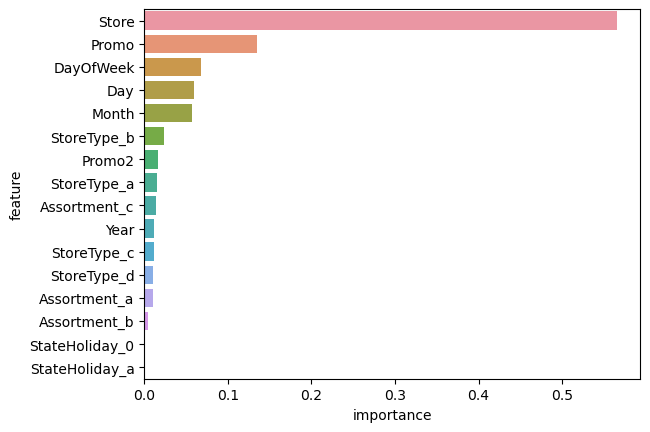

In [70]:
sns.barplot(data=feature_importance_df, x='importance', y='feature')

Overall, the analysis suggests that features related to store characteristics, promotional activities, and temporal factors (such as day of the week, day, and month) play crucial roles in predicting sales in the dataset used for training the RandomForestRegressor model.